In [2]:
from IPython.display import HTML
HTML('''<script>

code_show=true;

function code_toggle() {

if (code_show){

$('div.input').hide();

} else {

$('div.input').show();

}

code_show = !code_show

}

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import scipy.stats as stats
import importlib
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve 
from sklearn.metrics import roc_auc_score, f1_score, recall_score
import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
import Future_predictions as fp
import pickle
%pylab inline
pd.set_option('display.max_column',None)

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


## 2. Exploratory Data Analysis
**1) Load .csv to DataFrame**. I do not expect to have nulls or incorrect type of variable since I have done an exhaustive data cleaning on the real data previously (see: [Data loading and preparation Notebook](./TBVv1_data_cleaning.ipynb))   
**2) Select columns of interest**. See [dictionary of variables](./dictionary.xls)     
**3) Identify type of columns**      
**4) Dummify categorical values**    
**5) train and test split**  

### 1) Load .csv to DataFrame


Load the cleaned DataFrame with features, convert index = id_local and check that the content has been correctly loaded

In [4]:
df_locals = pd.read_csv('Data/censolocales/locals_sh_f_back.csv')
df_locals = df_locals.set_index(df_locals.id_local).drop('id_local',axis=1)
print('Commercial premises dataset head (2 first lines):')
df_locals.head(1)

Commercial premises dataset head (2 first lines):


,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,clase_vial_acceso,desc_vial_acceso,nom_acceso,num_acceso,cal_acceso,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,rotulo,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,conc,desc_sit_loc_modif_19,desc_sit_loc_modif_18,desc_sit_loc_modif_17,desc_sit_loc_modif_16,desc_sit_loc_modif_15,cerrado_19,abierto_19,cerrado_18,abierto_18,cerrado_17,abierto_17,cerrado_16,abierto_16,target,desc_act_norm,id_act_norm,ab_17_19,loc_dist_act,ab_dist_act_17_19,total_loc_act,total_ab_act_17_19,loc_dist,ab_dist_17_19,loc_na_dist,ab_dist_act_17_19_rate,total_ab_act_17_19_rate,total_ab_dist_17_19_rate,total_na_dist_rate,loc_barrio_act,ab_barrio_act_17_19,loc_barrio,ab_barrio_17_19,loc_na_barrio,ab_barrio_act_17_19_rate,total_ab_barr_17_19_rate,total_na_barr_rate,num_act,coord_x_final,coord_y_final,lat,lon,Población,Hombre,Mujeres,Densidad (Habitantes / Ha.),Edad promedio,Edad mediana,Renta media/persona (euros),Total Hogares,Españoles,Extranjeros,Mixtos,España fuera barrio dia laboral,Extranjero fuera barrio dia laboral,Total fuera barrio dia laboral,España fuera barrio fin semana,Extranjero fuera barrio fin semana,Total fuera barrio fin semana,Total barrio dia laboral,Total barrio fin semana,Total trabajo dia laboral,Total trabajo fin semana,total_TF_week,ratio_t_total,ratio_fb_total,ratio_b_total,dist_type,points_in_radius
id_local,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000162,1,CENTRO,104,JUSTICIA,Agrupado,1.0,Abierto,CALLE,BARCELO ...,NUM,6,,99000056.0,MERCADO MUNICIPAL DE BARCELO,12.0,Mercado Municipal,POLLERIAS RODRIGUEZ & MARTINEZ,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,47,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",472206,"COMERCIO AL POR MENOR DE AVES, HUEVOS Y CAZA S...",POLLERIAS RODRIGUEZ & MARTINEZ-BARCELO-6,Abierto,Abierto,Abierto,Abierto,No disponible,0,0,0,0,0,0,0,1,0,"COMERCIO AL POR MENOR DE AVES, HUEVOS Y CAZA S...",472206,0,48,14.0,826,147.0,14344,2926,2166,29.166667,17.79661,20.398773,15.10039,6,0.0,2086,528,131,0.0,25.311601,6.279962,1,440692.59,4475369.53,40.426848,-3.699164,115198,58027,57171,257.985172,44.026383,42.109404,16147,67296,50164,8979,8153,1956512,348482,2304994,960027,169516,1129543,623007,241830,363775,110026,4773175,0.099263,0.71955,0.181187,1,5


In [5]:
print('Commercial premises dataset shape:',df_locals.shape)

Commercial premises dataset shape: (8893, 92)


All variables are no-null and the types are correct (almost all of them are numeric except the descriptions, address and billboards that are object)

In [6]:
print('Commercial premises dataset info:')
df_locals.info()

Commercial premises dataset info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8893 entries, 10000162 to 290000865
Data columns (total 92 columns):
id_distrito_local                      8893 non-null int64
desc_distrito_local                    8893 non-null object
id_barrio_local                        8893 non-null int64
desc_barrio_local                      8893 non-null object
desc_tipo_acceso_local                 8893 non-null object
id_situacion_local                     8893 non-null float64
desc_situacion_local                   8893 non-null object
clase_vial_acceso                      8893 non-null object
desc_vial_acceso                       8893 non-null object
nom_acceso                             8893 non-null object
num_acceso                             8893 non-null int64
cal_acceso                             8893 non-null object
id_agrupacion                          8893 non-null float64
nombre_agrupacion                      8893 non-null object
id_tipo_

### 2) Select columns of interest

I select the columns that have sense from a business point of view and drop the rest:      
- Fields related addresses, billboards,...      
- Have a numerical and name description (desc_ variable vs id_variable)       
- UTM coordinates (keeping lon and lat)    
- I remove 'id_local' for now because it will not be used in any of the prediction stages   

As I already knew, I have an **imbalanced distribution**. I will manage it later during the modeling process

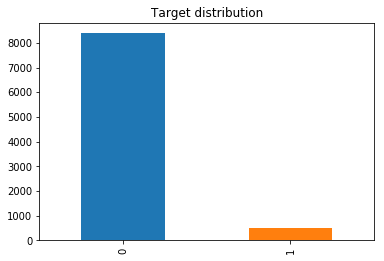

In [7]:
#Imbalanced distribution
plot = df_locals['target'].value_counts().plot(kind='bar',
                                            title='Target distribution')

In [8]:
# I check the % of target vs total: improves in 3pp (having more than a category per local could be predictive)
print('Target "1s"/total ratio: %0.2f' %(len(df_locals[df_locals.target == 1])/len(df_locals)))

Target "1s"/total ratio: 0.06


The dataset has 92 columns or atributes, one of them the target. I select the columns to work with (see [dictionary of variables](./dictionary.xls) for details)

In [9]:
#Select the columns of interest and filter the DataFrame
columns_of_interest = ['id_distrito_local','id_barrio_local', 'id_epigrafe', 'target', 'id_tipo_agrup','ab_17_19', 
'loc_dist_act', 'ab_dist_act_17_19', 'total_loc_act', 'total_ab_act_17_19', 'loc_dist', 'ab_dist_17_19',
'loc_na_dist', 'ab_dist_act_17_19_rate', 'total_ab_act_17_19_rate', 'total_ab_dist_17_19_rate', 'total_na_dist_rate',
'loc_barrio_act', 'ab_barrio_act_17_19', 'loc_barrio', 'ab_barrio_17_19', 'loc_na_barrio', 'ab_barrio_act_17_19_rate',
'total_ab_barr_17_19_rate','total_na_barr_rate', 'lon', 'lat', 'num_act', 'Población', 'Hombre', 
'Mujeres', 'Densidad (Habitantes / Ha.)', 'Edad mediana', 'Renta media/persona (euros)', 'Total Hogares', 'Españoles', 'Extranjeros',
'España fuera barrio dia laboral', 'Extranjero fuera barrio dia laboral', 'Total fuera barrio dia laboral',
'España fuera barrio fin semana', 'Extranjero fuera barrio fin semana',
'Total fuera barrio fin semana', 'Total barrio dia laboral', 'Total barrio fin semana',
'Total trabajo dia laboral', 'Total trabajo fin semana', 'total_TF_week',
'ratio_t_total', 'ratio_fb_total', 'ratio_b_total', 'dist_type', 'points_in_radius']

df_locals_v2 = df_locals[columns_of_interest]
print('New Dataset shape:', df_locals_v2.shape)
print('Variables of interest:', df_locals.columns.values)

New Dataset shape: (8893, 53)
Variables of interest: ['id_distrito_local' 'desc_distrito_local' 'id_barrio_local'
 'desc_barrio_local' 'desc_tipo_acceso_local' 'id_situacion_local'
 'desc_situacion_local' 'clase_vial_acceso' 'desc_vial_acceso'
 'nom_acceso' 'num_acceso' 'cal_acceso' 'id_agrupacion'
 'nombre_agrupacion' 'id_tipo_agrup' 'desc_tipo_agrup' 'rotulo'
 'id_seccion' 'desc_seccion' 'id_division' 'desc_division' 'id_epigrafe'
 'desc_epigrafe' 'conc' 'desc_sit_loc_modif_19' 'desc_sit_loc_modif_18'
 'desc_sit_loc_modif_17' 'desc_sit_loc_modif_16' 'desc_sit_loc_modif_15'
 'cerrado_19' 'abierto_19' 'cerrado_18' 'abierto_18' 'cerrado_17'
 'abierto_17' 'cerrado_16' 'abierto_16' 'target' 'desc_act_norm'
 'id_act_norm' 'ab_17_19' 'loc_dist_act' 'ab_dist_act_17_19'
 'total_loc_act' 'total_ab_act_17_19' 'loc_dist' 'ab_dist_17_19'
 'loc_na_dist' 'ab_dist_act_17_19_rate' 'total_ab_act_17_19_rate'
 'total_ab_dist_17_19_rate' 'total_na_dist_rate' 'loc_barrio_act'
 'ab_barrio_act_17_19' 'loc_b

I still have 52 variables (plus target). In general, **there is not too much correlation between variables and target** (below 10% in all cases):

In [10]:
correlations = df_locals_v2.corr()
correlations = correlations['target']
print('Correlation factor vs target variable:')
print(correlations.sort_values(ascending=False))

Correlation factor vs target variable:
target                                 1.000000
id_tipo_agrup                          0.084949
Extranjero fuera barrio fin semana     0.059007
Extranjero fuera barrio dia laboral    0.057648
loc_barrio                             0.055028
ab_barrio_17_19                        0.052591
loc_na_barrio                          0.050181
ab_dist_act_17_19_rate                 0.043841
Total fuera barrio fin semana          0.041716
ab_dist_17_19                          0.041166
ab_barrio_act_17_19                    0.037898
España fuera barrio fin semana         0.037492
ab_barrio_act_17_19_rate               0.036704
total_na_barr_rate                     0.033498
Total fuera barrio dia laboral         0.030586
loc_dist                               0.026987
Extranjeros                            0.026522
ratio_fb_total                         0.024058
España fuera barrio dia laboral        0.023989
total_TF_week                          0.023084
l

I plot the correlation matrix. It includes too many variables but it is easy to check an select once you are familiarized with the variables. Main relations to revise are between:  
- Premises KPIs    
- Populations KPIs   
- Floating traffic KPIs

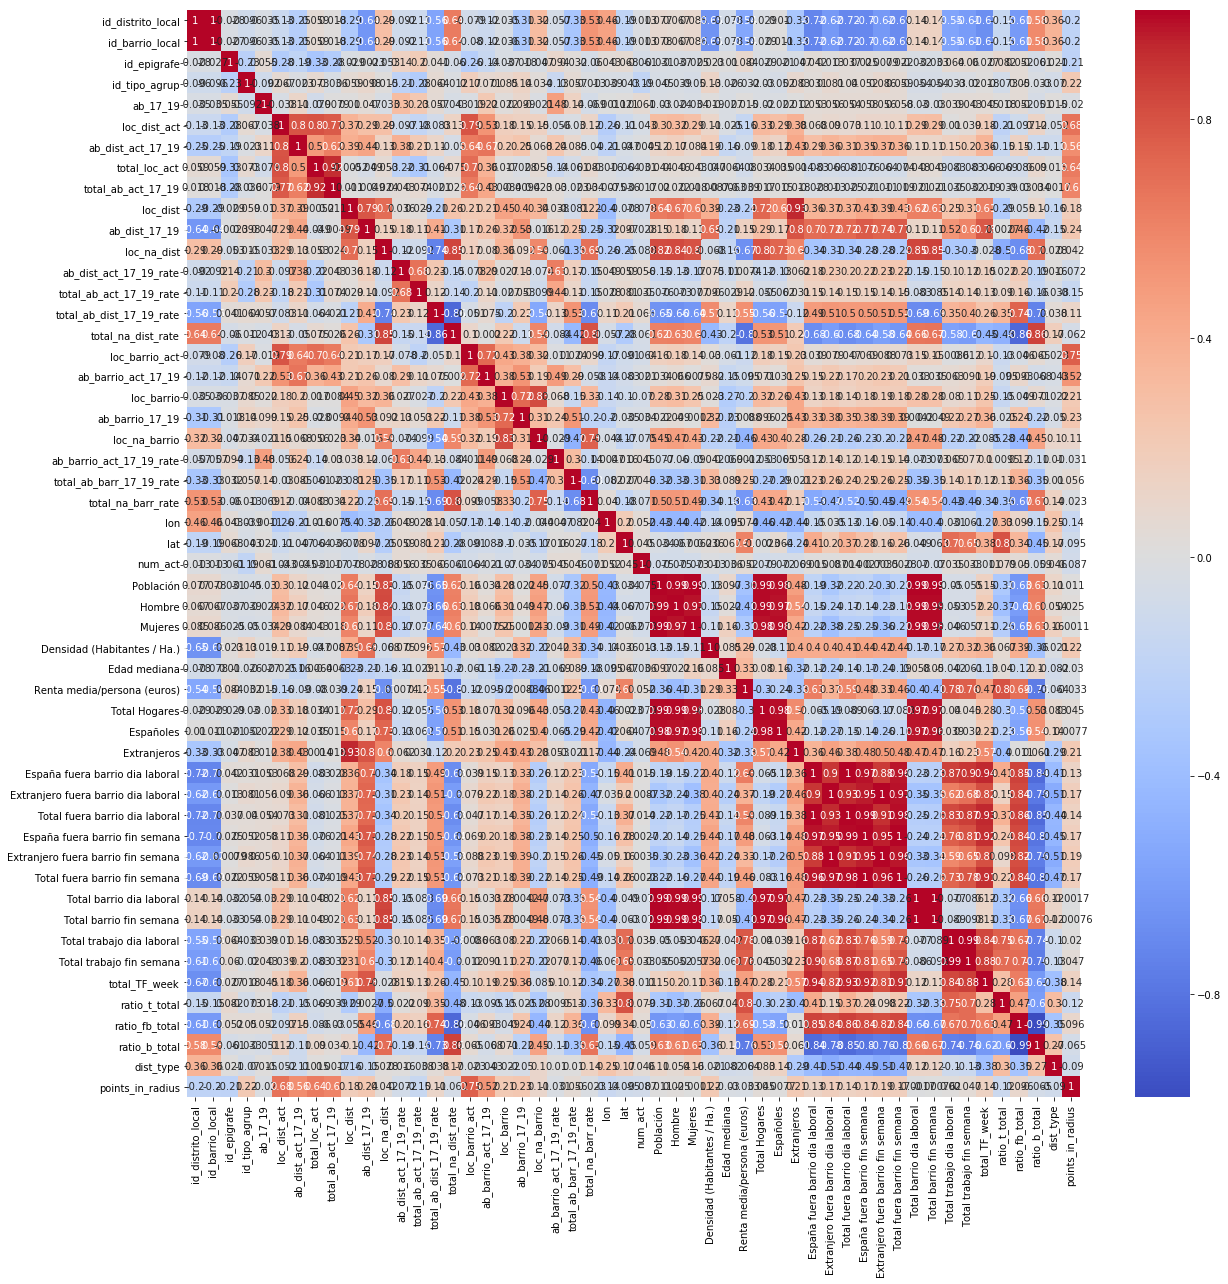

In [11]:
#seaborn correlation figure
plt.figure(figsize=(20,20))
sns.heatmap(df_locals_v2.drop('target',axis=1).corr(),annot = True, cmap ='coolwarm')

To select **final features for modeling:**  
- I keep variables with low o none correlation with others  
- For variables highly correlated among themselves (> 0.8), I keep the ones more correlated to target (table above) 

In [12]:
# # Final variables after checking correlation matrix
cols_drop = ['id_barrio_local', 'ab_barrio_act_17_19', 'loc_dist', 'loc_na_dist', 'loc_barrio', 
             'total_na_dist_rate', 'total_ab_act_17_19_rate','ab_dist_act_17_19', 'loc_dist_act',
             'Población', 'Hombre','Total Hogares',
             'Extranjeros', 'Españoles', 
             'España fuera barrio dia laboral', 'Extranjero fuera barrio dia laboral',
             'Total fuera barrio dia laboral', 'España fuera barrio fin semana',
             'Total fuera barrio fin semana',
             'Total barrio dia laboral', 'Total barrio fin semana',
             'Total trabajo dia laboral', 'total_TF_week',
             'ratio_t_total', 'ratio_fb_total', 'ratio_b_total']

df_locals_final = df_locals_v2.drop(cols_drop, axis=1)
print('Final dataset main features shape:', df_locals_final.shape)

Final dataset main features shape: (8893, 27)


### 3) Identify the type of columns
I have followed the steps of the article https://medium.com/vickdata/four-feature-types-and-how-to-transform-them-for-machine-learning-8693e1c24e80. I check:     
- Variables info() -> all of them are numerical although some of them are nominal
- Columns -> 26 + target  
- Null values -> 0

In [13]:
def quick_analysis(df):
    print('Data Types:')
    print(df.dtypes)
    print('Rows and Columns:')
    print(df.shape)
    print('Column Names:')
    print(df.columns)
    print('Null Values:')
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
quick_analysis(df_locals_final.drop('target',axis=1))

Data Types:
id_distrito_local                       int64
id_epigrafe                             int64
id_tipo_agrup                         float64
ab_17_19                                int64
total_loc_act                           int64
total_ab_act_17_19                    float64
ab_dist_17_19                           int64
ab_dist_act_17_19_rate                float64
total_ab_dist_17_19_rate              float64
loc_barrio_act                          int64
ab_barrio_17_19                         int64
loc_na_barrio                           int64
ab_barrio_act_17_19_rate              float64
total_ab_barr_17_19_rate              float64
total_na_barr_rate                    float64
lon                                   float64
lat                                   float64
num_act                                 int64
Mujeres                                 int64
Densidad (Habitantes / Ha.)           float64
Edad mediana                          float64
Renta media/persona (e

**Data statistics:**  
- The variables are not too disperse except for the population info. Anyhow, the main KPIs are a grouped per district so the differences have to be taken into account in the models    
- Diferente numerical scales. It is needed to scale variables before modeling  

In [14]:
df_locals_final.drop('target',axis=1).describe()

,id_distrito_local,id_epigrafe,id_tipo_agrup,ab_17_19,total_loc_act,total_ab_act_17_19,ab_dist_17_19,ab_dist_act_17_19_rate,total_ab_dist_17_19_rate,loc_barrio_act,ab_barrio_17_19,loc_na_barrio,ab_barrio_act_17_19_rate,total_ab_barr_17_19_rate,total_na_barr_rate,lon,lat,num_act,Mujeres,Densidad (Habitantes / Ha.),Edad mediana,Renta media/persona (euros),Extranjero fuera barrio fin semana,Total trabajo fin semana,dist_type,points_in_radius
count,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000
mean,9.519060,542669.532779,2.298887,0.218149,1120.309907,241.066794,1513.120769,22.991395,16.619784,15.135050,304.659283,500.455414,22.863744,16.956700,25.069855,-3.689056,40.418786,1.413584,74018.205555,168.592201,44.170636,15879.394130,33854.508040,71577.766895,2.305409,8.620263
std,5.518382,168282.718545,4.998330,0.413012,744.543968,137.027677,608.101492,12.176907,3.730635,12.670159,181.665046,399.650706,19.567373,6.708405,11.806138,0.039602,0.033471,1.025805,21161.838855,90.283441,1.856840,4906.621543,45131.445235,26332.519594,0.782923,9.158846
min,1.000000,472102.000000,-1.000000,0.000000,254.000000,48.000000,449.000000,0.000000,10.538521,1.000000,1.000000,1.000000,0.000000,3.846154,3.846154,-3.814394,40.332026,1.000000,19080.000000,10.344042,39.567590,9395.000000,2035.000000,24059.000000,1.000000,0.000000
25%,5.000000,472201.000000,-1.000000,0.000000,507.000000,147.000000,1097.000000,14.457831,13.758581,6.000000,183.000000,179.000000,8.333333,11.779607,16.032064,-3.711108,40.393671,1.000000,57171.000000,93.661108,42.672722,11925.000000,7104.000000,50249.000000,2.000000,2.000000
50%,10.000000,472302.000000,-1.000000,0.000000,902.000000,193.000000,1443.000000,20.833333,15.395868,11.000000,268.000000,409.000000,20.000000,16.690998,22.382445,-3.696868,40.417893,1.000000,67568.000000,180.121234,43.395233,15048.000000,19866.000000,66310.000000,3.000000,6.000000
75%,14.000000,472407.000000,4.000000,0.000000,1125.000000,329.000000,1761.000000,29.166667,20.398773,20.000000,361.000000,700.000000,33.333333,20.702465,35.157319,-3.664035,40.439532,1.000000,96250.000000,257.985172,45.492514,18573.000000,39454.000000,94278.000000,3.000000,11.000000
max,21.000000,960205.000000,15.000000,1.000000,2456.000000,461.000000,2926.000000,100.000000,23.110721,61.000000,825.000000,1742.000000,100.000000,100.000000,53.421053,-3.563257,40.532730,13.000000,105519.000000,298.017711,48.871349,25969.000000,169516.000000,111528.000000,3.000000,72.000000


I plot the variables distribution to identify the type of them (nominal, ordinal, categorical). You can see features that are continuous, dichotomous and nominal.

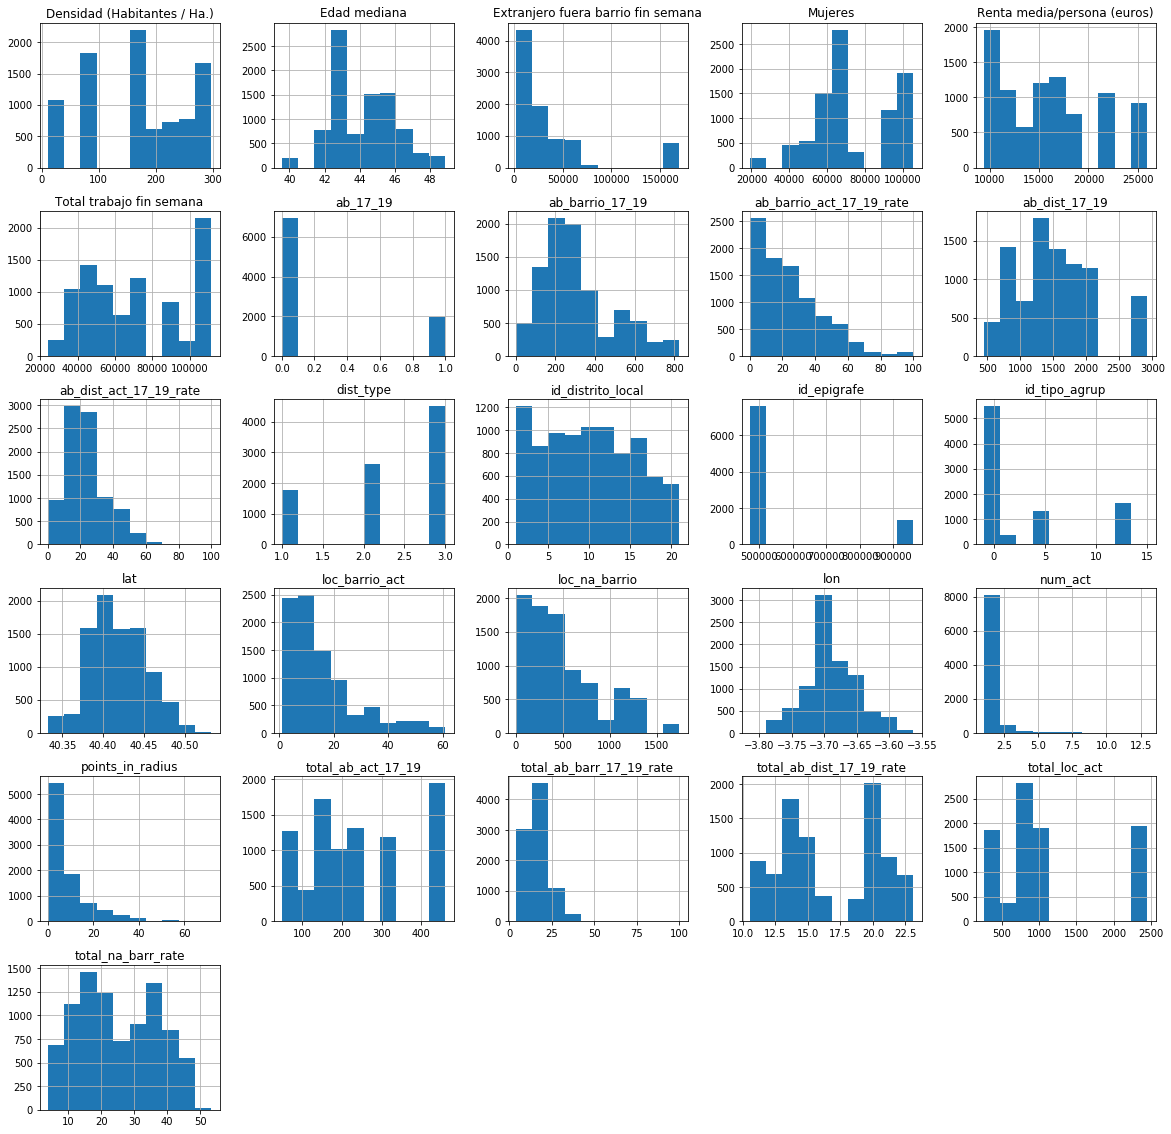

In [15]:
df = df_locals_final.drop('target',axis=1)
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[20,20]);

**Types of features:**   
**- Continous**: 'total_loc_act', 'total_ab_act_17_19', 'ab_dist_17_19', 'ab_dist_act_17_19_rate', 'total_ab_dist_17_19_rate', 'loc_barrio_act', 'ab_barrio_17_19', 'loc_na_barrio', 'ab_barrio_act_17_19_rate',       'total_ab_barr_17_19_rate', 'total_na_barr_rate', 'lon', 'lat','num_act', 'Mujeres', 'Densidad (Habitantes / Ha.)', 'Edad mediana','Renta media/persona (euros)', 'Extranjero fuera barrio fin semana','Total trabajo fin semana','points_in_radius'   
**- Dichotomous**: 'ab_17_19'   
**- Nominal**: 'id_distrito_local', 'id_epigrafe', 'id_tipo_agrup', 'dist_type'

I will scale the continous variables and encode the nominal variable. For this I will take as reference the code and article: https://towardsdatascience.com/an-easier-way-to-encode-categorical-features-d840ff6b3900**  

### 4) Dummify categorical values

I prefer to use Pandas dummies to keep the original columns name in the dummified columns name (with One_hot_encoding I lost the original columns name and made more difficult the final interpretation of the results)

In [16]:
# categorical and numerical features
cat_feature = ['id_distrito_local', 'id_epigrafe', 'id_tipo_agrup','dist_type','ab_17_19']
num_feature = ['total_loc_act', 'total_ab_act_17_19', 'ab_dist_17_19', 'ab_dist_act_17_19_rate', 
               'total_ab_dist_17_19_rate', 'loc_barrio_act', 'ab_barrio_17_19', 'loc_na_barrio', 
               'ab_barrio_act_17_19_rate', 'total_ab_barr_17_19_rate', 'total_na_barr_rate', 'lon', 
               'lat','num_act', 'Mujeres', 'Densidad (Habitantes / Ha.)', 'Edad mediana',
               'Renta media/persona (euros)', 'Extranjero fuera barrio fin semana',
               'Total trabajo fin semana','points_in_radius' ]

# dummify categorical variables
df_locals_final = pd.get_dummies(df_locals_final, columns = cat_feature)

print('Variables after dummification (includes target):')
print(df_locals_final.columns.values)
print('Total dataset shape:', df_locals_final.shape)

Variables after dummification (includes target):
['target' 'total_loc_act' 'total_ab_act_17_19' 'ab_dist_17_19'
 'ab_dist_act_17_19_rate' 'total_ab_dist_17_19_rate' 'loc_barrio_act'
 'ab_barrio_17_19' 'loc_na_barrio' 'ab_barrio_act_17_19_rate'
 'total_ab_barr_17_19_rate' 'total_na_barr_rate' 'lon' 'lat' 'num_act'
 'Mujeres' 'Densidad (Habitantes / Ha.)' 'Edad mediana'
 'Renta media/persona (euros)' 'Extranjero fuera barrio fin semana'
 'Total trabajo fin semana' 'points_in_radius' 'id_distrito_local_1'
 'id_distrito_local_2' 'id_distrito_local_3' 'id_distrito_local_4'
 'id_distrito_local_5' 'id_distrito_local_6' 'id_distrito_local_7'
 'id_distrito_local_8' 'id_distrito_local_9' 'id_distrito_local_10'
 'id_distrito_local_11' 'id_distrito_local_12' 'id_distrito_local_13'
 'id_distrito_local_14' 'id_distrito_local_15' 'id_distrito_local_16'
 'id_distrito_local_17' 'id_distrito_local_18' 'id_distrito_local_19'
 'id_distrito_local_20' 'id_distrito_local_21' 'id_epigrafe_472102'
 'id_epigraf

### 5) Train and test split

- I reserve a random subset of 5% of population to check final prediction (reserved dataset from now onwards)  
- I generate X and y variables and training and test split with the remaining dataset  

In [17]:
# 5% subset (df_locals_reserved)
df_locals_reserved = df_locals_final.sample(frac = 0.05,random_state=42)
print('Reserved dataset lenght: %0.0f' %(len(df_locals_reserved)))

# I generate X and y variables and training and test split with the remaining dataset.
df_locals_rest = df_locals_final.drop(df_locals_reserved.index, axis = 0)
print('Total population before train and test split: %0.0f' %len(df_locals_rest))

X = df_locals_rest.drop('target',axis=1)
y = df_locals_rest['target']

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print('Total X_train shape:', X_train.shape)
print('Total y_train size: %0.0f' %len(y_train))
print('Total X_test shape:', X_test.shape)
print('Total y_test size: %0.0f' %len(y_test))

# show the distribution
print('y_train class distribution')
print(y_train.value_counts(normalize=True))

print('y_test class distribution')
print(y_test.value_counts(normalize=True))

Reserved dataset lenght: 445
Total population before train and test split: 8448
Total X_train shape: (5913, 75)
Total y_train size: 5913
Total X_test shape: (2535, 75)
Total y_test size: 2535
y_train class distribution
0    0.944191
1    0.055809
Name: target, dtype: float64
y_test class distribution
0    0.941223
1    0.058777
Name: target, dtype: float64


## 3.  Modeling

**This part is composed of following chapters:**  
1) **Base model**: Logistic Regression  
2) **Random Forest**     
3) **XGboost**. Includes optimal cut-off analysis  and cummulative Gain and lift charts   
4) **Features importance** with the best estimator  
5) **Future prediction** (with reserved 5% of samples)   

Next, there are general assumptions for all the models:   

**- Managing imabalanced data**:   
Since it is an imbalanced dataset, I am going to test two types to manage it:   
- Class_weight: no resampling, simply make the classifier aware of imbalanced data by incorporating the weights of the classes into the cost function   
- SMOTE: Synthetic Minority Over-sampling Technique: up-sampling with new synthetic data generated at some distance from minority data and one of their neighbours   

I will make the test with Logistic Regression and I will select the one with the best results for the rest.  

**- Metrics**: AUC, Recall, Precision & Recal curve, f1_score, Cummulative Gain and Lift (only with best estimator)


**- Modeling Steps**:   
1) Generate Classifier (Gridsearch for Random Forest and XGboost)   
2) Fit   
3) Metrics  
4) Compare results   

### 1.A) Logistic regression classifier (with class_weight imbalanced management)

#### 1) Classifier

I had to fit several models varying the inverse-regularization parameter to get the LogisticRegression to converge with C = 0.01 (with C=1.0 by default there was a warning of lbfgs failed to converge)

In [18]:
logreg = Pipeline([('scaler', StandardScaler()),
                   ('classifier', LogisticRegression(C=0.01,solver='lbfgs',
                                                     class_weight='balanced',
                                                     random_state=42))])

#### **2) Fit the model**

In [19]:
logreg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

**3) Metrics**  
**Confussion matrix and classification report**  
All the metrics evaluation are performed with test subset
I will start with Confusion Matrix and classification report.   
In my case, I want to have a high recall (good differentiation between 'open' and closed'). I this case the class 1 ('closed' commercial premises) recall is **0.62**.  
I see signal in the variables. I will test more developped algorithms (Random forest and XGboost)

In [20]:
#predict class values
pred = logreg.predict(X_test)

metrics.plot_cm(y_test,pred)

Confusion matrix:
[[1557  829]
 [  57   92]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.65      0.78      2386
           1       0.10      0.62      0.17       149

    accuracy                           0.65      2535
   macro avg       0.53      0.64      0.48      2535
weighted avg       0.91      0.65      0.74      2535



**Roc - Auc**   
I calculate probabilities (predict_proba), the AUC (with sklearn function) and draw down the ROC curve.  
The AUC is not fair yet **0.695** but quite close (I consider fair an AUC between 0.7-0.8, good between 0.8-0.9 and excelent > 0.9).

No Skill: ROC AUC=0.500
Logistic_cw: ROC AUC=0.695


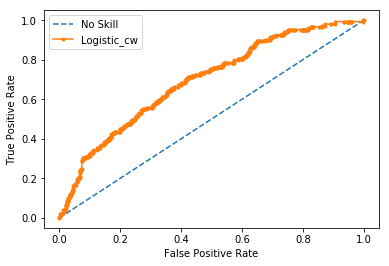

In [21]:
# predict probabilities
pred_prob_cw = logreg.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_prob_cw = pred_prob_cw[:,1]

# calculate AUC and ROC
lr_auc_roc_cw, lr_fpr_cw, lr_tpr_cw, _lr_th = metrics.plot_roc_curve(y_test,lr_prob_cw,
                                                              'Logistic_cw')

**Precision-recall curve**  
The model slightly differentiates classes (recall = 0.62)) but precision is quite low (the model is bad at predicting the positive class).  
The scores show that besides having a 'closed to fair' ROC Curve, is barely skillful when we look at precision and recall of the positive class.  The plot of the precision-recall curve highlights that the model is just barely above the "no Skill" line for most of the thresholds.  
Reference: :https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ 

Logistic_cw: f1=0.172 auc=0.128


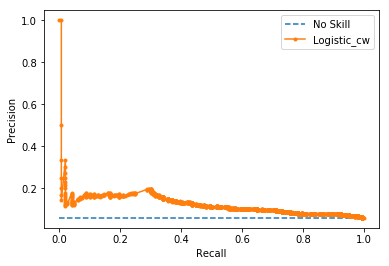

In [22]:
lr_f1_cw, lr_precision_cw, lr_recall_cw = metrics.plot_prec_rec(y_test,pred,lr_prob_cw,'Logistic_cw')

**4) Results**  
I will load the results in a DataFrame to compare the outputs of different models. I will compare recall, AUC and f1 score   
Now, I have my baseline (logistic regression with class weight 'balanced': logreg_cw).  
Next, I am going to test imbalance management wih SMOTE also with a Logistic Regression and then I will train a Random Forest and a Xgboost classifier.

In [23]:
result = pd.DataFrame(index=['recall', 'auc_roc','f1'])
result['logreg_cw'] = [cross_val_score(logreg,X,y,scoring='recall',cv=5).mean(),
                       cross_val_score(logreg,X,y,scoring='roc_auc',cv=5).mean(),
                       cross_val_score(logreg,X,y,scoring='f1',cv=5).mean()]

In [24]:
result

,logreg_cw
recall,0.640921
auc_roc,0.686973
f1,0.168868


### 1.B) Logistic regression classifier (with SMOTE imbalanced management)

#### 1) Classifier
I include the SMOTE function from imblearn library in the pipeline to manage imbalance

In [25]:
# I add SMOTE to the pipeline
smt = SMOTE(random_state=42)
logreg_sm = Pipeline([('imbalance',smt),
                      ('scaler', StandardScaler()),
                      ('classifier', LogisticRegression(solver='lbfgs',
                                                        C=0.01,
                                                        random_state=42))])

#### **2) Fit the model**

In [26]:
logreg_sm.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imbalance',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

**3) Metrics**  
**Confussion matrix and classification report**  
I this case the class 1 recall is **0.60** (lower than with class_weight 'balanced' that was 0.62).

In [27]:
#predict class values
pred_sm = logreg_sm.predict(X_test)
#confussion matrix
metrics.plot_cm(y_test,pred_sm)

Confusion matrix:
[[1593  793]
 [  60   89]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      2386
           1       0.10      0.60      0.17       149

    accuracy                           0.66      2535
   macro avg       0.53      0.63      0.48      2535
weighted avg       0.91      0.66      0.75      2535



**Roc - Auc**   
The AUC is also lower than the baseline alternative with class_weight imbalance management: **0.693** vs 0.695.

No Skill: ROC AUC=0.500
Logistic_sm: ROC AUC=0.693


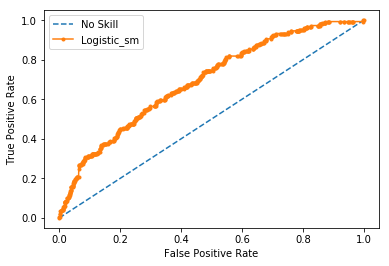

In [28]:
# predict probabilities
pred_prob_sm = logreg_sm.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_prob_sm = pred_prob_sm[:,1]

# calculate AUC and ROC curve
lr_auc_roc_sm, lr_fpr_sm, lr_tpr_sm, _lr_th = metrics.plot_roc_curve(y_test,lr_prob_sm
                                                                     ,'Logistic_sm')

**Precision-recall curve**  
It is fairly equivalent to baseline. Let's have a look to final results with crossvalidation 

Logistic_sm: f1=0.173 auc=0.136


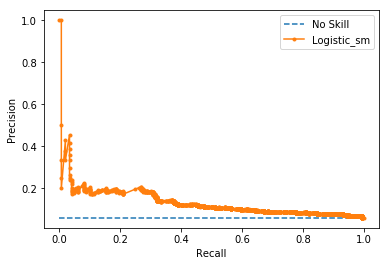

In [29]:
# precision, recall and f1
lr_f1_sm, lr_precision_sm, lr_recall_sm = metrics.plot_prec_rec(y_test,pred_sm,lr_prob_sm,
                                                                'Logistic_sm')

**4) Results**  
I load the results with SMOTE in the results DataFrame to compare the outputs of different models (logreg_sm).   
Logistic Regression with SMOTE underperforms in all the indicators vs class_weight parameter tuning. From now onwards in this study, I will apply class_weight parameter to manage class imbalance

In [30]:
result['logreg_sm'] = [cross_val_score(logreg_sm,X,y,scoring='recall',cv=5).mean(),
                       cross_val_score(logreg_sm,X,y,scoring='roc_auc',cv=5).mean(),
                       cross_val_score(logreg_sm,X,y,scoring='f1',cv=5).mean()]

In [31]:
result

,logreg_cw,logreg_sm
recall,0.640921,0.601206
auc_roc,0.686973,0.682756
f1,0.168868,0.161746


## 2) Random Forest

#### 1) Classifier
I have tested diferent **Random Forest** strategies with Randomized Search and GridSearch (optimizing Recall and AUC).  
See the details in [Random Forest Tuning](./TBV1_clas_rf.ipynb) (this Notebook can be executed to reproduce results. It takes aprox. 1 hour execution time).  
Here I reproduce the best classifier I got with GridSearch optimizing recall_scoring.  
The parameters are:  
- 'bootstrap': False
- 'criterion': 'gini'
- 'max_depth': 4
- 'max_features': 'auto'
- 'min_samples_leaf': 17
- 'n_estimators': 20


In [32]:
# Instanciate the classifier
clf_rf = Pipeline([('scaler', StandardScaler()),
                    ('classifier', RandomForestClassifier(n_estimators=20,
                                                          min_samples_leaf=17,
                                                          max_features='auto',
                                                          max_depth=4,
                                                          class_weight='balanced',
                                                          bootstrap= False,
                                                          criterion= 'gini',
                                                          random_state=42))])

#### **2) Fit the model**

In [33]:
clf_rf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=4,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=17,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=20, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start

**3) Metrics**  
**Confussion matrix and classification report**  
I this case the class 1 recall (our objective) has improved **0.68**. The precision is low (1 out of 10)

In [34]:
#predict class values
pred_rf = clf_rf.predict(X_test)
#confussion matrix
metrics.plot_cm(y_test,pred_rf)

Confusion matrix:
[[1511  875]
 [  47  102]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.63      0.77      2386
           1       0.10      0.68      0.18       149

    accuracy                           0.64      2535
   macro avg       0.54      0.66      0.47      2535
weighted avg       0.92      0.64      0.73      2535



**Roc - Auc**   
The AUC has improved and is now a fair **0.715**

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.715


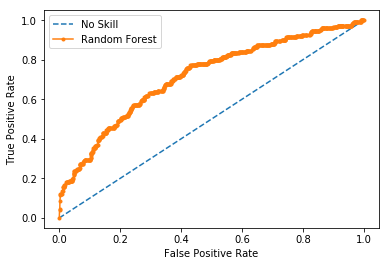

In [35]:
# predict probabilities
rf_prob = clf_rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_prob = rf_prob[:,1]

#calculate scores
rf_auc_roc, rf_fpr, rf_tpr, _rf_th = metrics.plot_roc_curve(y_test,rf_prob,
                                                         'Random Forest')

**Precision-recall curve**  
The precision-recall curve is also better than baseline with a f1 score of **0.18** (still far from good but improving). I thought that the shape of this plot was due to certain overfitting. I check curve on training set and was fairly the same. See results in [Random Forest Tuning](./TBV1_clas_rf.ipynb)

Random Forest: f1=0.181 auc=0.218


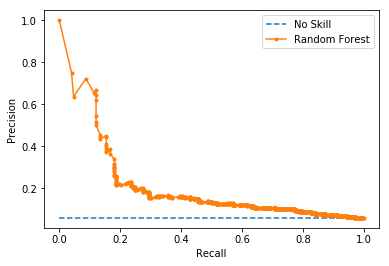

In [36]:
# precision, recall and f1
rf_f1, rf_precision, rf_recall = metrics.plot_prec_rec(y_test,pred_rf,rf_prob,
                                                          'Random Forest')

**4) Results**  
I load the results in the results DataFrame.   
The basic model with Random Forest outperforms baseline in all the metrics and it has an AUC > 0.7

In [37]:
result['clf_rf'] = [cross_val_score(clf_rf,X,y,scoring='recall',cv=5).mean(),
                       cross_val_score(clf_rf,X,y,scoring='roc_auc',cv=5).mean(),
                       cross_val_score(clf_rf,X,y,scoring='f1',cv=5).mean()]

In [38]:
result

,logreg_cw,logreg_sm,clf_rf
recall,0.640921,0.601206,0.655570
auc_roc,0.686973,0.682756,0.711137
f1,0.168868,0.161746,0.176056


## XGBoost
I have used several references to work with Xgboost algoritm. For this exercise  I will use the XGB Scikit-learn API. In the future I will drill down in the xgb library and Datamatrix structures:  
- https://www.datacamp.com/community/tutorials/xgboost-in-python  
- https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

#### 1) Classifier
I have tested diferent **Xgboost** strategies with GridSearch.  
See the details in [Xgboost Tuning](./TBV1_cla_xgb.ipynb) (this Notebook can be executed to reproduce results).  
Here I reproduce the best classifier I got with GridSearch and recall scoring.  
The parameters are:    
- learning_rate = 0.05  
- n_estimators = 60  
- max_depth = 13  
- max_features = 'sqrt'  
- subsample=0.9  
- class_weight='balanced'  
- scoring = 'recall'  
- booster = 'gbtree'  

In [39]:
# Instanciate the classifier
clf_xgb =  Pipeline([('scaler',StandardScaler()),
                     ('classifier', xgb.XGBClassifier(learning_rate = 0.05,
                                                      n_estimators = 60,
                                                      max_depth = 13,
                                                      max_features = 'sqrt',
                                                      subsample=0.9,
                                                      class_weight='balanced',
                                                      scoring = 'recall',
                                                      booster = 'gbtree',
                                                      random_state=42))])


#### 2) Fit the model

In [40]:
clf_xgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               class_weight='balanced', colsample_bylevel=1,
                               colsample_bynode=1, colsample_bytree=1, gamma=0,
                               learning_rate=0.05, max_delta_step=0,
                               max_depth=13, max_features='sqrt',
                               min_child_weight=1, missing=None,
                               n_estimators=60, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               scoring='recall', seed=None, silent=None,
                               subsample=0.9, verbosity=1))],
         verbose=False)

**3) Metrics**  
**Confussion matrix and classification report**  
The recall score is too low and is because the probabilities that the model gives to class 1 are mostly below 0.5 and close to 0.1. On the othe hand, it is the classifier with the best precision score: **0.61**. Summarizing, identifies few 1s but those that identifies are more probable to happen.  
Anyhow, this classifier outperforms baseline in all metrics but recall and has the best AUC

In [41]:
#predict class values
pred_xgb = clf_xgb.predict(X_test)

#confussion matrix
metrics.plot_cm(y_test,pred_xgb)

Confusion matrix:
[[2373   13]
 [ 129   20]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2386
           1       0.61      0.13      0.22       149

    accuracy                           0.94      2535
   macro avg       0.78      0.56      0.60      2535
weighted avg       0.93      0.94      0.93      2535



**Roc - Auc**   

No Skill: ROC AUC=0.500
Xgboost: ROC AUC=0.755


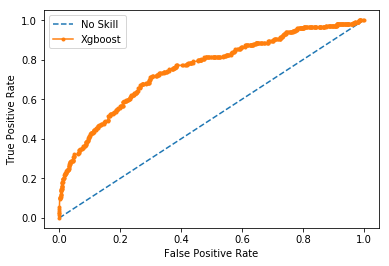

In [42]:
# predict probabilities
xgb_prob = clf_xgb.predict_proba(X_test)

# keep probabilities for the positive outcome only
xgb_prob = xgb_prob[:,1]

# calculate AUC and ROC curve
xgb_auc_roc, xgb_fpr, xgb_tpr, _xgb_th = metrics.plot_roc_curve(y_test,xgb_prob
                                                                ,'Xgboost')

**Precision-recall curve**  

Xgboost: f1=0.220 auc=0.280


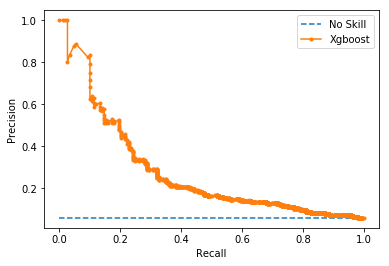

In [43]:
# precision, recall and f1
xgb_f1, xgb_precision, xgb_recall = metrics.plot_prec_rec(y_test,pred_xgb,xgb_prob,
                                                                   'Xgboost')

**4) Results**  

Looking at the low recall of the Xgboost, I am going to a further analysis of the results of this classifier

In [44]:
result['clf_xgb'] = [cross_val_score(clf_xgb,X,y,scoring='recall',cv=5).mean(),
                     cross_val_score(clf_xgb,X,y,scoring='roc_auc',cv=5).mean(),
                     cross_val_score(clf_xgb,X,y,scoring='f1',cv=5).mean()]

In [45]:
result

,logreg_cw,logreg_sm,clf_rf,clf_xgb
recall,0.640921,0.601206,0.655570,0.120833
auc_roc,0.686973,0.682756,0.711137,0.745001
f1,0.168868,0.161746,0.176056,0.173855


**5) Further analysis with Xgboost**  
Xgboost identifies few 1s but the ones it selects, are more precise. 
I am a bit surprised about the difference  with the other classifiers regarding the recall score, furthermore when it is the classifier with the best AUC and even more, it is the reference for classification algorithms nowadays. 
I have decided to deep dive in this case with two more analysis:  
**A) Find Optimal Cut off**. I will use the function **metrics.Find_Optimal_Cutoff** that I have created for this purpose  
**B) Cummulative and lift curves**  

**A) Optimal Cut off**  
The optimal cut off would be where true positive rate is high and false positie rate is low (tpr - (1-fpr) is zero or near to zero).   
I found a function in Stack overflow (https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python) to Find_Optimal_Cutoff and I have added it to my set of metrics functions as **metric.Find_Optimal_Cutoff** 

In [46]:
# Add prediction probability of xgb to dataframe
data = pd.DataFrame()
data['pred_proba'] = pd.Series(xgb_prob)

# Find optimal probability threshold
threshold = metrics.Find_Optimal_Cutoff(y_test,data['pred_proba'])

# Find prediction to the dataframe applying threshold
data['pred'] = data['pred_proba'].map(lambda x: 1 if x > threshold else 0)

# Print confusion Matrix
metrics.plot_cm(y_test,data['pred'])

The optimal cut-off is: 0.07
Confusion matrix:
[[1678  708]
 [  45  104]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82      2386
           1       0.13      0.70      0.22       149

    accuracy                           0.70      2535
   macro avg       0.55      0.70      0.52      2535
weighted avg       0.92      0.70      0.78      2535



Wow, the threshold goes really down (or up if you look at the Roc curve). The optimal threshold is 0.066. Almost near '0'.  
Plotting the '1s' probability, the biggest part is below 10% probability (see plot below). All the more reason to understand why the recall is so low with the 'by default' threshold of 0.5.  
One of the challenge will be the balance between improving recall vs make worse the precision

Class 1 probability distribution:


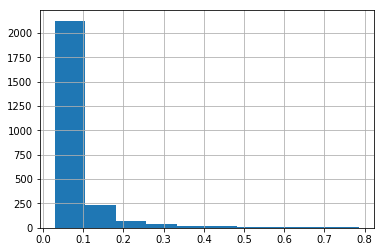

In [47]:
print('Class 1 probability distribution:')
data['pred_proba'].hist();

**2) Cummulative and lift curves**  
Is my algorithm sorting properly? I will try to answer that question with this analysis. 
I will check that the highest probabilities (of Class 1), gather the biggest ratio of Class 1 test ocurrences. I will:   
- sort probabilities per deciles 
- check if there is a bigger cummulation of '1s' in the target in the first deciles 
- compare with baseline (1s vs total target ratio).  

There are some libraries from scikitplot.metrics that do the same (plot_cumulative_gain, plot_lift_curve) but I prefer to calculate it by myself to get the detailed figures.

Most of the close locals are cummulated in first four percentiles:
        close_count  mean_prob
decile                        
10               54   0.296644
9                26   0.110613
8                21   0.076799
7                12   0.062030
6                 8   0.052611
5                 6   0.045756
4                 6   0.040456
3                10   0.036436
2                 2   0.033073
1                 4   0.030092
Lift main kpis:
        cum_close%_test  base %  lift_test  Class 1 vs total ratio
decile                                                            
10                36.24      10   3.624000                0.058777
9                 53.69      20   2.684500                0.058777
8                 67.79      30   2.259667                0.058777
7                 75.84      40   1.896000                0.058777
6                 81.21      50   1.624200                0.058777
5                 85.23      60   1.420500                0.058777
4        

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


(0.0, 5)

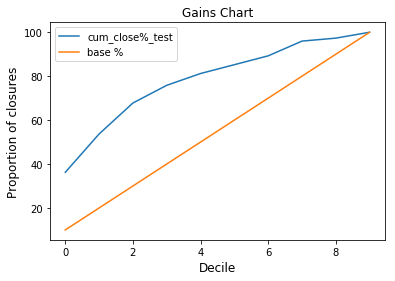

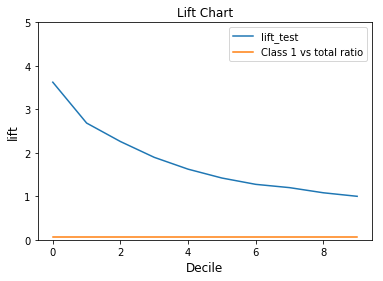

In [48]:
# DataFrame with target values
target_df = pd.DataFrame(y_test.values)

# DataFrame with probabilities (True = 1s)
pred_prob_df = pd.DataFrame(xgb_prob, columns=['prob_1'])

# Concat in a single DataFrame
df_cum_lift = pd.concat([target_df,pred_prob_df], axis=1,sort=False)

# Group probabilities per deciles
df_cum_lift.loc[:,'decile'] = pd.qcut(df_cum_lift.loc[:,'prob_1'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
df_cum_lift.columns = ['close','prob_ones','decile']

# Pivot table to show info sorted per deciles 
df_cum_lift_pivot = pd.pivot_table(data=df_cum_lift,index=['decile'],values=['close','prob_ones'],
                     aggfunc={'close':[np.sum],
                              'prob_ones': [np.mean]})

df_cum_lift_pivot.columns = ['close_count','mean_prob']

df_cum_lift_pivot.sort_values(by='mean_prob',ascending=False, inplace = True)

print('Most of the close locals are cummulated in first four percentiles:')
print(df_cum_lift_pivot)

# % Cummulative close (targe = 1)
df_cum_lift_pivot.loc[:,'cum_close%'] = np.round(((df_cum_lift_pivot['close_count'] / df_cum_lift_pivot.loc[:,'close_count'].sum()).cumsum()), 4) * 100

# I keep the cum_close% column for simplicity and rename it
df_cum_lift_pivot2 = df_cum_lift_pivot[['cum_close%']]
df_cum_lift_pivot2.reset_index()
df_cum_lift_pivot2.columns = ['cum_close%_test']


# add the deciles base
df_cum_lift_pivot2.loc[:,'base %'] = [10,20,30,40,50,60,70,80,90,100]

# Cummulative Gain chart
gains_chart = df_cum_lift_pivot2.plot(kind='line',use_index=False)
gains_chart.set_ylabel("Proportion of closures",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")

# calculate baseline (1s vs total target ratio)
base = len(y_test[y_test==1])/len(y_test)
df_cum_lift_pivot3 = df_cum_lift_pivot2.copy()
df_cum_lift_pivot3.loc[:,'lift_test'] = (df_cum_lift_pivot2.loc[:,'cum_close%_test']/df_cum_lift_pivot2.loc[:,'base %'])
df_cum_lift_pivot3.loc[:,'Class 1 vs total ratio']  = [base,base,base,base,base,base,base,base,base,base]

print('Lift main kpis:')
print(df_cum_lift_pivot3)

# plot lift chart
lift_chart1 = df_cum_lift_pivot3.drop(['cum_close%_test','base %'],axis=1).plot(kind='line',use_index=False)
lift_chart1.set_ylabel("lift",fontsize=12)
lift_chart1.set_xlabel("Decile",fontsize=12)
lift_chart1.set_title("Lift Chart")
lift_chart1.set_ylim(0.0,5)

In summary, **the model sorts quite well** and the highest probability relates to the biggest number of '1s': 
- In percentile 1 (10%), we have a lift of 3.6, 8 more times class 1 samples than in baseline 
- In percentile 2 (20%), we have a list of 2.7, 6 more times class 1 samples than baseline 

## 4) Features importance analysis
In this section I will:   
- get the weights of each feature within the model algoritm and plot feature importance
- evaluate the impact in recall by reducing features (tuning the number of features)
- list the 15 most important features

**Plot feature_importance**  
I will do with the functionality **feature_importance_** of Random Forest.
I need no fit the model our of the pipeline because feature_importante_ doesn't exist inside pipelines

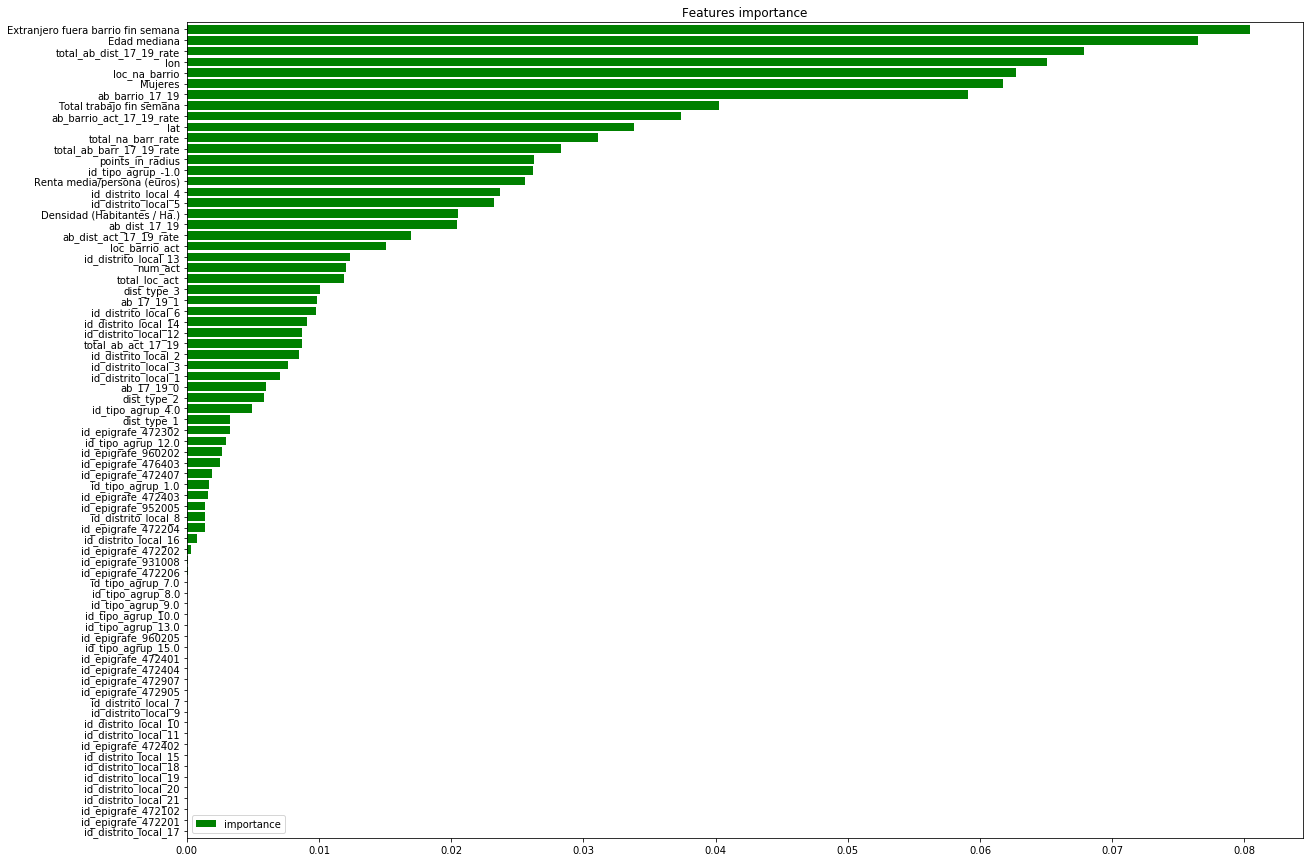

In [49]:
# First I have to Scale the numerical features because this was developed within the pipeline
scaler = StandardScaler()

# Train
num_s = X_train[num_feature]

x_scaled = scaler.fit_transform(num_s.values)
num_s = pd.DataFrame(x_scaled, columns=num_feature, index=X_train.index.values)
cat_ = X_train.drop(num_feature, axis=1)
X_train_scaled = pd.concat([num_s, cat_], axis=1)

# X_test
num_t = X_test[num_feature]
x_t_scaled = scaler.transform(num_t.values)
num_t = pd.DataFrame(x_t_scaled, columns=num_feature, index=X_test.index.values)
cat_t = X_test.drop(num_feature, axis=1)
X_test_scaled = pd.concat([num_t, cat_t], axis=1)

# instanciate the classifier
clf_rf_ff = RandomForestClassifier(n_estimators=20,
                                   min_samples_leaf=17,
                                   max_features='auto',
                                   max_depth=4,
                                   class_weight='balanced',
                                   bootstrap= False,
                                   criterion= 'gini',
                                   random_state=42)


clf_rf_ff.fit(X_train_scaled,y_train)

# Get the features importance and plot it
importantes_rf = pd.DataFrame(clf_rf_ff.feature_importances_,
                           columns=['importance'],
                          index=X_train_scaled.columns).sort_values('importance', ascending=True)


importantes_rf.plot(kind='barh',width=0.8, color='green',title='Features importance', figsize=[20,15])
plt.show()

**Tuning the number of features**     
I found a code sample in an article ( https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/) about an automated way of evaluating the number of features to use in a model. I have adopted and adapted to my code. It uses SelectFromModel from sklearn that is a meta-transformer for selecting features based on weights importance.  
Basically, the code is a 'for loop' where in each loop, one feature, selected by weight importance, is removed and the recall is reevaluated, till the end of the list of variables (75).

In [50]:
# use feature importance for feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import recall_score

# make predictions for test data and evaluate
y_pred = clf_rf_ff.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]
recall_ = recall_score(y_test, predictions)
print("Recall: %.2f%%" % (recall_ * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(clf_rf_ff.feature_importances_)
for thresh in thresholds:
    
    # select features using threshold
    selection = SelectFromModel(clf_rf_ff, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_scaled)
    
    # train model
    selection_model = RandomForestClassifier(n_estimators=20,
                                             min_samples_leaf=17,
                                             max_features='auto',
                                             max_depth=4,
                                             class_weight='balanced',
                                             bootstrap= False,
                                             criterion= 'gini',                                             
                                             random_state=42)
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test_scaled)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    recall_ = recall_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Recall: %.2f%%" % (thresh, select_X_train.shape[1], recall_*100.0))


Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=75, Recall: 68.46%
Thresh=0.000, n=51, Recall: 67.79%
Thresh=0.000, n=50, Recall: 63.76%
Thresh=0.000, n=49, Recall: 67.79%
Thresh=0.001, n=48, Recall: 67.79%
Thres

**I don't get conclusive results**. The first variable gets the highest recall. The correlation of the variables with the target is very low (remember, below 10%). This could be one of the explanations. Anyhow, I will reevaluate variables crosscorrelation and look for additional atributes to improve the model in future deliverables.

**Most important features**  
It is interesting to recall that the most relevant features are:
- Extranjeros fuera barrio fin de semana
- Edad mediana
- total rate of premises opened in the district
- geographical coordinates ('lon', 'lat')
- total rate of same activity commercial premises opened in the district
- total number of premises without activity
- same activity premises in a radius
- some districts: 4, 5, 13  

This rings a bell. 'lon' and 'lat', geographical coordinates, have a relevant weight in the model. I need a next level of granularity in the variables to go further (neighbourhood level instead of district level as they are now).   
See more details in [dictionary of variables](./dictionary.xls)

In [51]:
#I order in descending way
importantes_rf2_d = pd.DataFrame(clf_rf_ff.feature_importances_,
                           columns=['importance'],
                          index=X_train.columns).sort_values('importance', ascending=False)
print('List of the top 15 feautures by importance in the Random Forest Classifier:')
importantes_rf2_d.iloc[0:15]

List of the top 15 feautures by importance in the Random Forest Classifier:


,importance
Extranjero fuera barrio fin semana,0.080406
Edad mediana,0.076520
total_ab_dist_17_19_rate,0.067853
lon,0.065078
loc_na_barrio,0.062708
Mujeres,0.061744
ab_barrio_17_19,0.059076
Total trabajo fin semana,0.040261
ab_barrio_act_17_19_rate,0.037383
lat,0.033810


## 5) Future prediction
I have reserved a 5% of my dataset (**reserved dataset**) to run the model on the samples with class 0 target and evaluate wheter they will be closed in a 3 years timeframe or not.  
This is a very high level check out and the results can not be taken as definitive: 
- on one side, precision is quite low. This means that my prediction is right just 10% of times (one in ten).
- the target variable (commercial premises closed between 2017 -2019), generated to get enough samples, misses a lot of information. For instance, I cpuld predict that one of the commercial premises, that is now opened in my list, will close in a 3 years timeframe but I am not having into account how long the premises has been opened or any other external event that could happen in such a long period of time.
- on the other hand, what I can say, based in my recall (with CV), is that 65% of the commercial premises closed fron now in 3 years, should be in this list.   

**First: dataset variables distribution**  
I will check:   
- that the class 1 target ratio, is the same than in training set (0.06).  
- features distribution for the dataset and training are equivalent. To simplify the analysis, I will plot the distribution of the top ten features in importance (from previous analysis) for dataset and training.  

They should be the same because reserved dataset was randomly chosen from the original dataset but I prefer to follow these steps to go through the whole process of a data product development, use and maintenance.       

Number of open commercial premises in list: 417
Total commercial premises in list: 445
Closed vs total in list: 0.06

Main features distribution in train dataset:


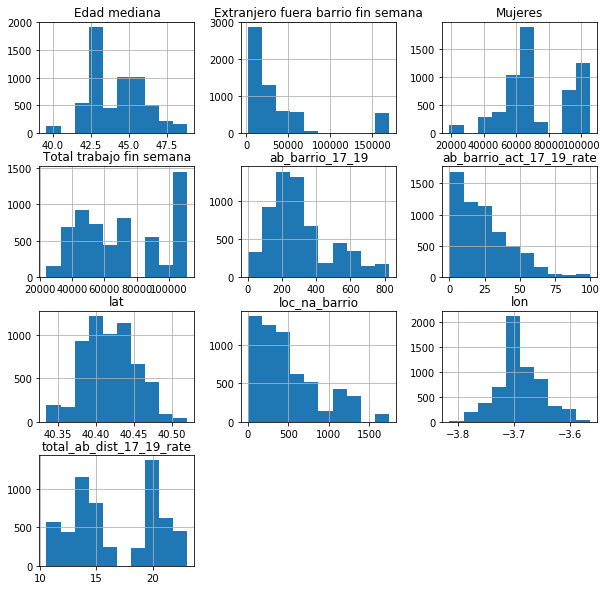

In [52]:
X_reserved = df_locals_reserved.copy()
X_open = X_reserved[X_reserved.target == 0]
print('Number of open commercial premises in list: %0.0f' %len(X_open))
print('Total commercial premises in list: %0.0f' %len(X_reserved))
print('Closed vs total in list: %0.2f' %(len(X_reserved[X_reserved.target == 1])/len(X_reserved)))
print()
print('Main features distribution in train dataset:')
X_train[importantes_rf2_d.iloc[0:10].index].hist(figsize=[10,10]);

Main features distribution in dataset to predict:


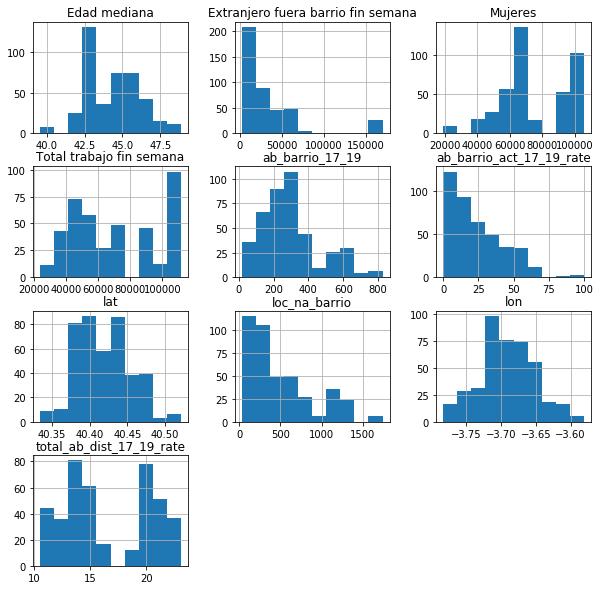

In [53]:
print('Main features distribution in dataset to predict:')
X_open[importantes_rf2_d.iloc[0:10].index].hist(figsize=[10,10]);

As expected, both datasets have the same distribution and target variable ration

**Prediction with Random Forest classifier (clf_rf)**   
As a kindly reminder: precision = 0.10 (confusion matrix), recall = 0.655 (CV results), AUC = 0.711 (CV results) 

In [54]:
locals_to_close_rf, locals_to_close_all, preds_rf = fp.future_preds(X_open, df_locals, clf_rf)

print('Number of commercial premises to close in 3 years predicted by Random Forest: %0.0f' %(len(locals_to_close_rf)))

print('Commercial premises to close in a period of time of 3 years with Random Forest detail (5 rows):')
locals_to_close_rf.head()

Number of commercial premises to close in 3 years predicted by Random Forest: 138
Commercial premises to close in a period of time of 3 years with Random Forest detail (5 rows):


,id_local,desc_distrito_local,desc_tipo_agrup,rotulo,desc_epigrafe
19,10001615,CENTRO,Mercado Municipal,ZONA 87,ESTABLECIMIENTOS DE VENTA DE PLATOS PREPARADOS...
37,10001909,CENTRO,SIN AGRUPACION,-,ESTABLECIMIENTOS DE VENTA DE PLATOS PREPARADOS...
80,10003592,CENTRO,SIN AGRUPACION,CONSUELA ...,COMERCIO AL POR MENOR DE ARTICULOS DEPORTIVOS
592,80000389,FUENCARRAL-EL PARDO,SIN AGRUPACION,TELEPIZZA,ESTABLECIMIENTOS DE VENTA DE PLATOS PREPARADOS...
620,80001162,FUENCARRAL-EL PARDO,SIN AGRUPACION,JOSE PAN,ESTABLECIMIENTOS DE VENTA DE PLATOS PREPARADOS...


Plot the results

Districts with commercial premises predicted to close in 3 years:


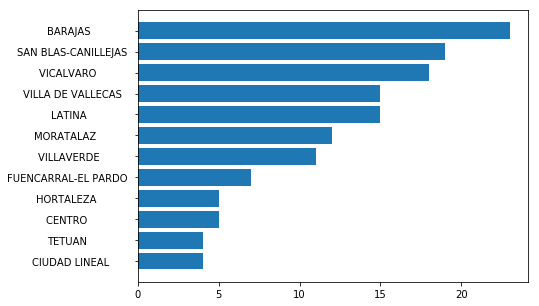

In [55]:
print('Districts with commercial premises predicted to close in 3 years:')
figure(figsize=(7, 5))
plt.barh(locals_to_close_rf['desc_distrito_local'].value_counts().index,
         sort(locals_to_close_rf['desc_distrito_local'].value_counts()));

Categories of commercial premises predicted to close in 3 years:


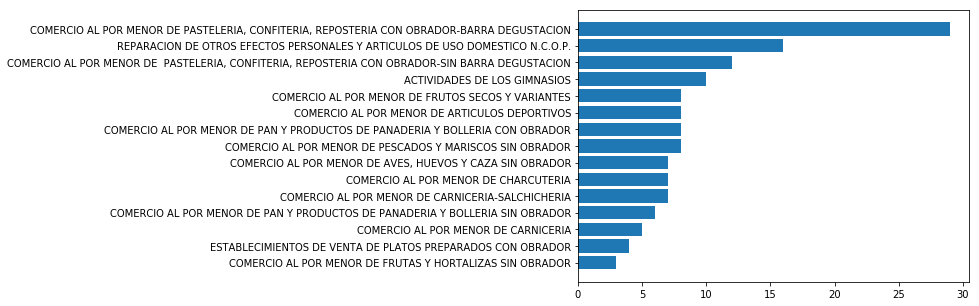

In [56]:
print('Categories of commercial premises predicted to close in 3 years:')
figure(figsize=(7, 5))
plt.barh(locals_to_close_rf['desc_epigrafe'].value_counts().index,
         sort(locals_to_close_rf['desc_epigrafe'].value_counts()));

One last exercise where I will update the prediction with the **optimal cutoff** of 0.51 calculated in [TBV1_cla_rf Optimal cutoff analysis for classifier clf_rft_gsr](./TBV1_clas_rf.ipynb)

In [57]:
preds_rf_oc = preds_rf['pred_proba'].map(lambda x: 1 if x > 0.51 else 0)

print('Commercial premises to close in 3 years identified by Random Forest wit optimal cutoff: %0.0f' 
      %(len(preds_rf_oc[preds_rf_oc==1])))

Commercial premises to close in 3 years identified by Random Forest wit optimal cutoff: 130


**Analysing the results**  
There are 138 commercial premises that the model predicts that will be closed in a period of three years.  
According to the precision of the model, 13-14 of the commercial premises in the total list will be closed in 3 years. 

Taking apart the precision, and explaining the results:   
- There are districts where no any commercial premises will close: **CARABANCHEL, PUENTE DE VALLECAS, SALAMANCA, CHAMBERI, ARGANZUELA, CHAMARTIN, USERA, RETIRO, MONCLOA-ARAVACA** This could indicate opportunities for new businessess. **A descriptive analysis confirms the result of the model** since these districts are down in the list with the lowest rate of closed businesses/total.
  
- On the other hand, **BARAJAS, SAN BLAS or VICALVARO, are in the top list of business downsize but they are not the top ranked per rate of closed businesses/total**. We should investigate a little bit more about the situation of these places because we could have found an interesting insight about the evolution of commerce in this districts.
   
- **4 of the 15 categories are bakeries or similar**. This confirms my feeling that there are too many bakeries in the city.  
   
- **Repairing shops, Gyms and small neighbourhood food stores** have relevance in the target list
- With the **optimal cut-off of 0.51**, the results are quite similar. The optimal threshold is quite close to the 0.5 by default.  
   
Now I will repeat the analysis with Xgboost that is more precise and check similarities

In [58]:
# Descriptive analysis: closed premises/total premises per district
df_2 = df_locals.reset_index()
df_3 = df_2[['desc_distrito_local','target']].groupby('desc_distrito_local').count()
df_4 = df_2[df_2.target == 1][['desc_distrito_local','target']].groupby('desc_distrito_local').count()
df_3.target.sum(), df_4.target.sum(), len(df_locals), len(df_locals[df_locals.target == 1])
df_5 = pd.concat([df_3,df_4],axis=1)
df_5.columns = ['total_premises','closed_premises']
df_5.loc[:,'rate'] = df_5.loc[:,'closed_premises']/df_5.loc[:,'total_premises']
print('Rate of closed premises/total premises per district:')
df_5.sort_values('rate',ascending=False)

Rate of closed premises/total premises per district:


,total_premises,closed_premises,rate
desc_distrito_local,,,
CENTRO,782,91,0.116368
MORATALAZ,244,27,0.110656
VILLAVERDE,383,39,0.101828
TETUAN,599,56,0.093489
VICALVARO,118,11,0.093220
CIUDAD LINEAL,612,55,0.089869
VILLA DE VALLECAS,203,17,0.083744
FUENCARRAL-EL PARDO,442,37,0.083710
BARAJAS,79,6,0.075949


**With Xgboost (clf_xgb)**  
I repeat the analysis with Xgboost that is more precise.   
As a kindly reminder: precision = 0.61 (confusion matrix), recall = 0.12 (CV results), AUC = 0.745 (CV results) 

In [59]:
locals_to_close_xgb, locals_to_close_all_, preds_xgb = fp.future_preds(X_open, df_locals, clf_xgb)

print('Number of commercial premises to close in 3 years identified by XGBoost: %0.0f' %(len(locals_to_close_xgb)))

print('Commercial premises to close in a period of time of 3 years by Xgboost:')
locals_to_close_xgb.head()

Number of commercial premises to close in 3 years identified by XGBoost: 4
Commercial premises to close in a period of time of 3 years by Xgboost:


,id_local,desc_distrito_local,desc_tipo_agrup,rotulo,desc_epigrafe
4288,270509377,FUENCARRAL-EL PARDO,SIN AGRUPACION,GIMNASIO MADRID 91,ACTIVIDADES DE LOS GIMNASIOS
5648,280015473,CENTRO,Mercado Municipal,MICHELE CHRISTIAN ROSA (PTOS 37 Y 38),ESTABLECIMIENTOS DE VENTA DE PLATOS PREPARADOS...
5685,280015518,CENTRO,Mercado Municipal,FRUTAS Y VERDURAS,COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS S...
6589,280039356,LATINA,Mercado Municipal,LOS MARAGATOS,COMERCIO AL POR MENOR DE CHARCUTERIA


**Analysing the results**  
There are four commercial premises that the model says that will be closed in a period of three years.  

"##" **Issue in the target generation**
Looking at these commercial premises, I have found an issue in the target generation. I have not filtered the commercial premises that were already closed before 2017 (as happens with id_local=280015518).

I have checked that the impact of this issue in the total dataset (df_locals) is small. There is 1,7% of registers wrongly targeted.
I will keep the target as it is for the first project delivery and I will correct it in the next version. 
Below there is an analysis of the ocurrences 'wrongly' targeted in the reserved dataset vs predicted with Random Forest classifier. The ratio of 'wrongly' targeted premises increases in the prediction (a clue that the classifier finds some signal) 

**Back to the results of the future prediction with Xgboost**, and having into account the precision of the model:
- two of these commercial premises will be closed in 3 years. Taking out the register wrongly targeted ('FRUTAS Y VERDURAS'), we can say that or 'Gimnasio Madrid 91' or 'Michele Christian Rosa' or 'Los Maragatos', will be closed in 3 years.  
- All of this 4 commercial premises are in the list predicted by Random Forest classifier. It could be taken as a double check validation of the results   

In [60]:
# Ratio of commercial premises closed before 2017 and not correctly target for the project
df = df_locals.reset_index()
print('Ratio of commercial premises closed before 2017 and not correctly target for the project:%0.3f'     
      %(len(df[df.cerrado_16 == 1])/len(df)))

# Total locals file reset_index()
df_ = df_locals.reset_index()

# Identifiy commercial premises wrongly targeted
global_ids_to_drop = df_[df_.cerrado_16 == 1].id_local.values

# Identifiy id_locals to drop in reserved dataset (for future predictions analysis)
ids_to_drop_reserved_ds = X_open[X_open.index.isin(global_ids_to_drop)].copy()

# Final dataset X_open_f
X_open_f = X_open.drop(X_open[X_open.index.isin(ids_to_drop_reserved_ds.index.values)].index)


# Compare wrong targeted vs total
print('Ratio of commercial premises closed before 2017 vs total reserved dataset: %0.3f'
     %(len(ids_to_drop_reserved_ds)/len(X_open)))

# Check the number of wrongly targeted in the reserve list and in random forest future prediction
wrong_targeted_pred = locals_to_close_rf[locals_to_close_rf.id_local.isin(ids_to_drop_reserved_ds.index.values)]

print('Ratio of commercial premises closed before 2017 vs total predicted by Random forest classifier: %0.3f' 
      % (len(wrong_targeted_pred)/len(locals_to_close_rf)))

print('List of wrong targeted identified by classifier:')
wrong_targeted_pred 

Ratio of commercial premises closed before 2017 and not correctly target for the project:0.017
Ratio of commercial premises closed before 2017 vs total reserved dataset: 0.019
Ratio of commercial premises closed before 2017 vs total predicted by Random forest classifier: 0.029
List of wrong targeted identified by classifier:


,id_local,desc_distrito_local,desc_tipo_agrup,rotulo,desc_epigrafe
1880,270107745,TETUAN,Galeria de Alimentacion,VARIANTES,COMERCIO AL POR MENOR DE FRUTOS SECOS Y VARIANTES
5685,280015518,CENTRO,Mercado Municipal,FRUTAS Y VERDURAS,COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS S...
6173,280027777,TETUAN,Mercado Municipal,PAN BOLLERIA VARELA/BC98 A 103,COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PA...
7688,280063851,MORATALAZ,Galeria de Alimentacion,CARNICERIA,COMERCIO AL POR MENOR DE CARNICERIA


## 4. Summary and conclusions

### 1) Summary

**1) Exploratory Data Analysis**

* **Load .csv to DataFrame**: df_locals: 
    * 8893 observations and 92 atributes (including target variable)
    * imbalanced dataset: class 1 vs total ratio = 0.06
* **Select columns of interest**: 
    * 27 variables (including target)
    * low correlation between atributes and target (< 0.1 method pearson (by default))
* **Identify type of columns**: 21 numerical (to scale) and 5 categorical (to dummify)
* **Dummify categorical values**: with Pandas to keep name of the column
* **train and test split**: 5% **reserved dataset** for 'future prediction' analysis, out of 95%: 70% **train** and and 30% **test**

**2)  Modeling**

* **Base model**: Logistic Regression:
    * logreg_cw: logistic regression with class weight parameter
    * logreg_sm: logistic regresion with SMOTE
* **Random Forest**: clf_rf     
* **XGboost**: clf_xgb. Includes optimal cut-off analysis  and cummulative Gain and lift charts   

**3) Comparing results**   
The xgboost has the best AUC although Random Forest is better in recall and f1. I am thinking now on improving precision so in next steps, I will focus in Xgboost 

In [61]:
result

,logreg_cw,logreg_sm,clf_rf,clf_xgb
recall,0.640921,0.601206,0.655570,0.120833
auc_roc,0.686973,0.682756,0.711137,0.745001
f1,0.168868,0.161746,0.176056,0.173855


Roc Curve

No Skill: ROC AUC=0.500
Logistic Regresion_cw: ROC AUC=0.695
Random Forest: ROC AUC=0.715
Xgboost: ROC AUC=0.755


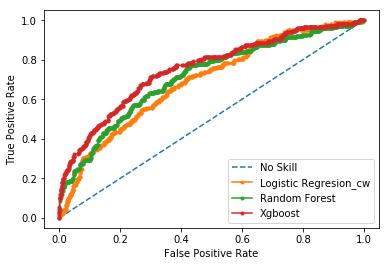

In [62]:
# No Skill probability
ns_prob = [0 for _ in range(len(y_test))]
    
#calculate scores
ns_auc = roc_auc_score(y_test, ns_prob)

# summarize scores and compare with previous classifiers
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regresion_cw: ROC AUC=%.3f' % (lr_auc_roc_cw))
print('Random Forest: ROC AUC=%.3f' % (rf_auc_roc))
print('Xgboost: ROC AUC=%.3f' % (xgb_auc_roc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr_cw, lr_tpr_cw, marker='.', label='Logistic Regresion_cw')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

Precision and recall curve

Logistic Regresion_cw : f1=0.172
Random Forest : f1=0.181
Xgboost : f1=0.220


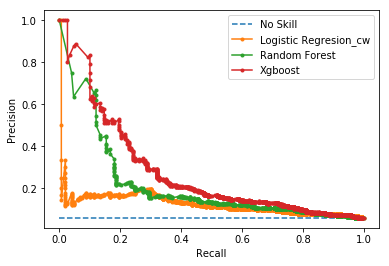

In [63]:
# summarize scores
print('Logistic Regresion_cw : f1=%.3f' % lr_f1_cw)
print('Random Forest : f1=%.3f' % rf_f1)
print('Xgboost : f1=%.3f' % xgb_f1)

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall_cw, lr_precision_cw, marker='.', label='Logistic Regresion_cw')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
plt.plot(xgb_recall, xgb_precision, marker='.', label='Xgboost')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()

Cummulative gain and lift curve (only for Xgboost)   
The Xgboost mode sorts quite well and the highest probability relates to the biggest number of '1s': 
- In percentile 1 (10%), we have a lift of 3.6, 8 more times class 1 samples than in baseline 
- In percentile 2 (20%), we have a list of 2.7, 6 more times class 1 samples than baseline 

/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


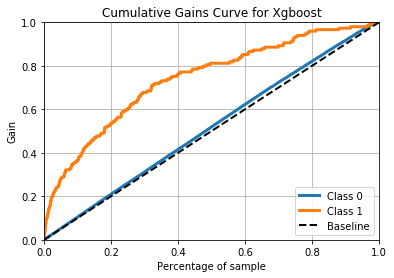

In [64]:
plot_cumulative_gain(y_test, clf_xgb.predict_proba(X_test),title = 'Cumulative Gains Curve for Xgboost');

/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


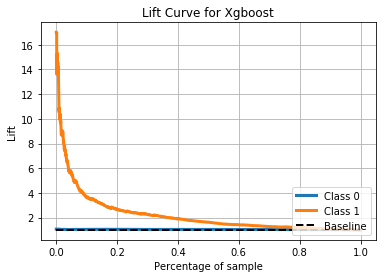

In [65]:
plot_lift_curve(y_test, clf_xgb.predict_proba(X_test),title = 'Lift Curve for Xgboost');

Optimal cut-off (for Xgboost)  
The threshold goes really down (or up if you look at the Roc curve). The optimal threshold is 0.066. Almost '0'.  
Class 1 probability is cummulated around 10%. All the more reason to understand why the recall is so low with the 'by default' threshold of 0.5.  

In [66]:
# Add prediction probability of xgb to dataframe
data = pd.DataFrame()
data['pred_proba'] = pd.Series(xgb_prob)

# Find optimal probability threshold
threshold = metrics.Find_Optimal_Cutoff(y_test,data['pred_proba'])

# Find prediction to the dataframe applying threshold
data['pred'] = data['pred_proba'].map(lambda x: 1 if x > threshold else 0)

# Print confusion Matrix
metrics.plot_cm(y_test,data['pred'])

The optimal cut-off is: 0.07
Confusion matrix:
[[1678  708]
 [  45  104]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82      2386
           1       0.13      0.70      0.22       149

    accuracy                           0.70      2535
   macro avg       0.55      0.70      0.52      2535
weighted avg       0.92      0.70      0.78      2535



**4) Features importance**   
Analyzed with Random Forest feature_importance_ functionality

The most relevant features are:
- Extranjeros fuera barrio fin de semana
- Edad mediana
- total rate of premises opened in the district
- geographical coordinates ('lon', 'lat')
- total rate of same activity commercial premises opened in the district
- total number of premises without activity
- same activity premises in a radius
- some districts: 4 (SALAMANCA), 5 (CHAMARTIN), 13 (PUENTE VALLECAS)

In [67]:
#I order in descending way
importantes_rf2_d = pd.DataFrame(clf_rf_ff.feature_importances_,
                           columns=['importance'],
                          index=X_train.columns).sort_values('importance', ascending=False)
print('List of the top 15 feautures by importance in the Random Forest Classifier:')
importantes_rf2_d.iloc[0:15]

List of the top 15 feautures by importance in the Random Forest Classifier:


,importance
Extranjero fuera barrio fin semana,0.080406
Edad mediana,0.076520
total_ab_dist_17_19_rate,0.067853
lon,0.065078
loc_na_barrio,0.062708
Mujeres,0.061744
ab_barrio_17_19,0.059076
Total trabajo fin semana,0.040261
ab_barrio_act_17_19_rate,0.037383
lat,0.033810


**5) Future prediction**  
Analysis performed with the reserved dataset (5% of initial population, target == 0).
The idea is the predict which of the open business will be closed in a period of three years.

Results **with Random Forest Classifier**:
 - There are 138 commercial premises that the model predicts that will be closed in a period of three years. According to the precision of the model, 13-14 of the commercial premises in the total list will be closed in 3 years. 

- There are districts where no any commercial premises will close: **CARABANCHEL, PUENTE DE VALLECAS, SALAMANCA, CHAMBERI, ARGANZUELA, CHAMARTIN, USERA, RETIRO, MONCLOA-ARAVACA** This could indicate opportunities for new businessess. **A descriptive analysis confirms the result of the model** since these districts are down in the list with the lowest rate of closed businesses/total.
  
- On the other hand, **BARAJAS, SAN BLAS or VICALVARO, are in the top list of business downsize but they are not the top ranked per rate of closed businesses/total**. We should investigate a little bit more about the situation of these places because we could have found an interesting insight about the evolution of commerce in this districts.
   
- **4 of the 15 categories are bakeries or similar**. This confirms my feeling that there are too many bakeries in the city.  
   
- **Repairing shops, Gyms and small neighbourhood food stores** have relevance in the target list
- With the **optimal cut-off of 0.51**, the results are quite similar. The optimal threshold is quite close to the 0.5 by default.  
   
- Xgboost only predicted 4 premises, all of them included in Random Forest prediction

Districts with commercial premises predicted to close in 3 years:


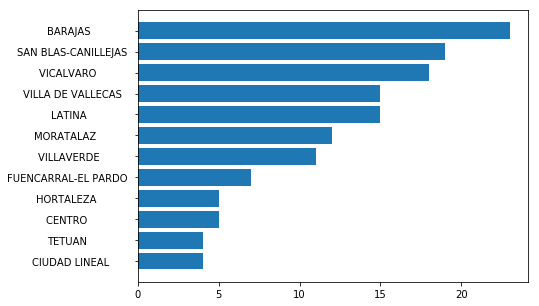

In [68]:
print('Districts with commercial premises predicted to close in 3 years:')
figure(figsize=(7, 5))
plt.barh(locals_to_close_rf['desc_distrito_local'].value_counts().index,
         sort(locals_to_close_rf['desc_distrito_local'].value_counts()));

Categories of commercial premises predicted to close in 3 years:


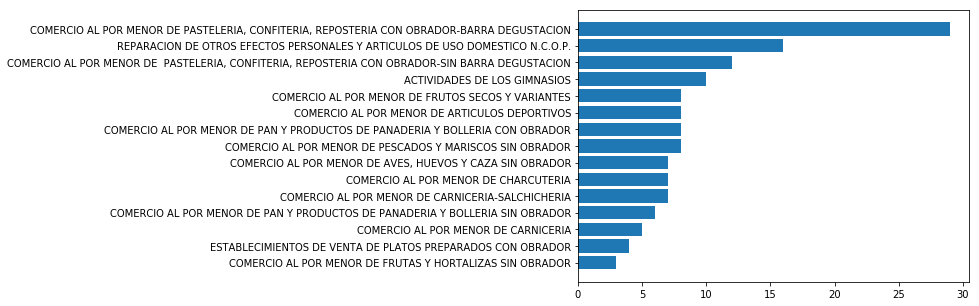

In [69]:
print('Categories of commercial premises predicted to close in 3 years:')
figure(figsize=(7, 5))
plt.barh(locals_to_close_rf['desc_epigrafe'].value_counts().index,
         sort(locals_to_close_rf['desc_epigrafe'].value_counts()));

### 2) Conclusions
Let's conclude this analysis by now:  
- This is a preliminary and descriptive study that opens the door to further analysis and insights.
- The results are still not conclusive due to:
    * the low scoring in general and of some of the metrics (precision) in particular
    * training metrics are sometimes worse than test. I have to deep dive in hyperparameter tuning for the two main algorithms I have used: Random Forest and Xgboost
    * Some issues found in the target variable during the analysis have to be solved in next version
    * Low correlation of features with the target variable. I need to look for better variables or for more granularity of the existing ones
    * I have focused on recall score too much because for a business is critical to anticipate a possible waste of money in the event of a closure, that is to say that it is better to get all the possible class 1 target at the expense of precision. Having said this, later in the study, I have realized that based on the final target available (open businesses that will close in the period of three years), the recall is not so critical but the precision gets more importance if we apply the results of the model to select the riskier business to offer alternatives that may anticipate a bad situation that could lead to their closure.
    
### 3) Next steps
I have a lot of ideas for the next version:
- Rethink and **correct the target variable**
- **Fine tune the models** and hyperparameters
- Get **more features**: 
    - New: location vs points of interest and transport stations; web scrapping in Google places for more accurate information about commercial premises status); stores prices from Idealista
    - More granularity of the existing (neighbourhood or postal code level)    
- **Pilot** the results. This could be slow. I will look for some comditions to test quickly: ie. visit the premises with the highest probability of closure a validate the context with the data available. 
- **Code optimization**
- **Industrialize** all the steps in a pipeline
- **End user web or app** for information queries

In [70]:
# Save the models
import pickle
# save models to disk (logreg_cw, rf, xgb)
pickle.dump(logreg,open('clf_lr.pkl','wb'))
pickle.dump(clf_rf,open('clf_rf.pkl','wb'))
pickle.dump(clf_xgb,open('clf_xgb.pkl','wb'))